In [2]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Here is a summary of the strokes we know so far
* axial (B15), max=0.26mm (-494N), min=-0.13mm (+494N)
* tangent (A4), max = 0.17(?)mm (1720N)

In [16]:
start = Time('2020-03-05T18:51:00') #this is UTC
end = Time('2020-03-05T19:30:00') 

client = EfdClient('summit_efd')
csc_index = 1

In [18]:
dfa = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

14


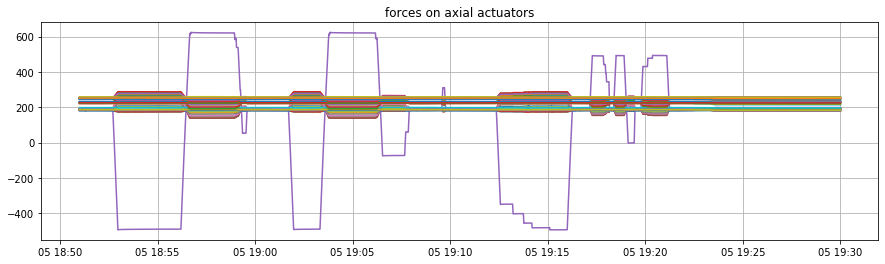

In [19]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(72):
    plt.plot(pd.to_datetime(dfa.private_sndStamp, unit='s'), dfa['axialForceMeasured%d'%i])
    if (max(dfa['axialForceMeasured%d'%i])>300):
        print(i)
plt.title('forces on axial actuators')
plt.grid();

In [24]:
len(dfa)/2

22404.5

In [26]:
dfa.axialForceMeasured14[0],max(dfa.axialForceMeasured14[22400:]),min(dfa.axialForceMeasured14[22400:])

(187.45614624023438, 493.79998779296875, -494.2347412109375)

In [38]:
print('%.2f N/micron'%(494*2/390))
print('at 0mm, force = %.2f N'%(-494+269*2.53333))

2.53 N/micron
at 0mm, force = 187.47 N


In [9]:
dfa = await client.select_time_series('lsst.sal.MTM2.axialActuatorPositionAbsoluteEncoderPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

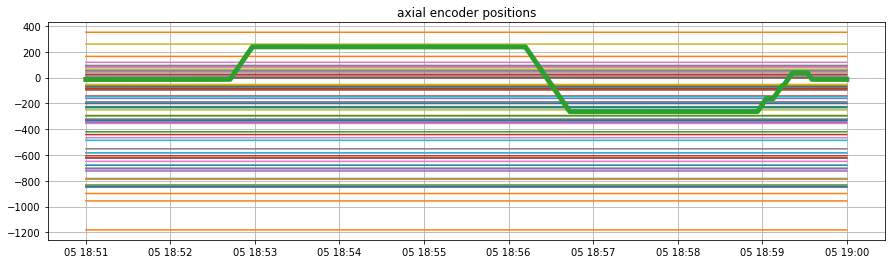

In [12]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(72):
    plt.plot(pd.to_datetime(dfa.private_sndStamp, unit='s'), dfa['axialEncoderPositionMeasured%d'%i])
plt.plot(pd.to_datetime(dfa.private_sndStamp, unit='s'), dfa['axialEncoderPositionMeasured%d'%14],linewidth=5)
plt.title('axial encoder positions')
plt.grid();

In [4]:
dfa = await client.select_time_series('lsst.sal.MTM2.axialActuatorAbsolutePositionSteps', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

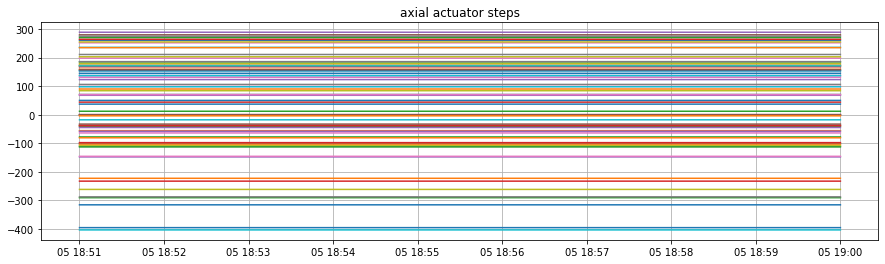

In [6]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(72):
    plt.plot(pd.to_datetime(dfa.private_sndStamp, unit='s'), dfa['axialAbsolutePositionSteps%d'%i])
plt.title('axial actuator steps')
plt.grid();
#in a01*ipynb, when we changed B1 by stroke, the steps read from GUI changed. Is this a EFD problem?

### A4

In [39]:
start = Time('2020-03-05T19:20:00') #this is UTC
end = Time('2020-03-05T19:40:00') 

In [40]:
dft = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

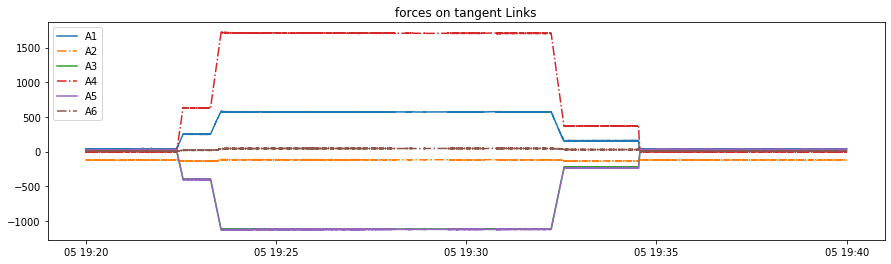

In [41]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(6):
    if np.mod(i,2) == 0:
        bb = '-'
    else:
        bb = '-.'
    plt.plot(pd.to_datetime(dft.private_sndStamp, unit='s'), 
             dft['tangentLink%dDegForceMeasured'%((i)*60)], bb,label='A%d'%(i+1))
plt.legend(loc='upper left')
plt.title('forces on tangent Links');

In [45]:
max(dft.tangentLink180DegForceMeasured), max(dft.tangentLink180DegForceMeasured)/450

(1720.6680908203125, 3.8237068684895834)